# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Malus-with-two-polarizers" data-toc-modified-id="Malus-with-two-polarizers-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Malus with two polarizers</a></div><div class="lev3 toc-item"><a href="#Motors-definition" data-toc-modified-id="Motors-definition-101"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Motors definition</a></div><div class="lev3 toc-item"><a href="#Labjack-definition" data-toc-modified-id="Labjack-definition-102"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Labjack definition</a></div><div class="lev2 toc-item"><a href="#Experiments" data-toc-modified-id="Experiments-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Experiments</a></div><div class="lev3 toc-item"><a href="#Linear-polarized-parallel" data-toc-modified-id="Linear-polarized-parallel-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Linear polarized parallel</a></div><div class="lev3 toc-item"><a href="#Fitting-data-to-sine" data-toc-modified-id="Fitting-data-to-sine-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Fitting data to sine</a></div><div class="lev2 toc-item"><a href="#Experiments" data-toc-modified-id="Experiments-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Experiments</a></div><div class="lev3 toc-item"><a href="#Linear-polarized-crossed" data-toc-modified-id="Linear-polarized-crossed-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Linear polarized crossed</a></div><div class="lev2 toc-item"><a href="#Final:-Close" data-toc-modified-id="Final:-Close-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Final: Close</a></div>

# Malus with two polarizers

Author: Luis Miguel Sanchez Brea

Date:   30/01/2018

Purpose: Ecograb project, polariscope callibration

We have diode laser at 850 nm (current = 314 mA)
We have lens for collimating and Thorlabs DG10-600-B diffuser

We have polarizer 1 Thorlabs LPNIRE100-B

We have polarizer 4 Thorlabs LPNIRE100-B

We have $\lambda/4$ Thorlabs WPQ10E-850-SP at motor 2

Polarizer 1 is placed at 0º, arbitrarily

Polarizer 4 is placed at 70.496º for pass light (aligned to polarizer 1)

We rotate $\lambda/4$ (motor 2 )

We rotate polarizer 4 in order to determine the polarization parameters of WPQ10E-850-SP. We assume that polarizers do not present depolarization and then, Jones Matrix formalism is valid:

Theory is performed in **TODO**

In order to determine parameters of $\lambda/4$ 

After this formalism, we pass to Mueller using Jones-Mueller Transformation 

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import hickle as hkl
import time
import pprint
from __future__ import print_function

### Motors definition

In [3]:
from polarimeter.motors.rotary_motors import Motors
Comports = [3, 4, 5, 7] 
Vels = [600, 600, 600, 600]

70.306


In [4]:
motors = Motors(RS232_COMPORT=Comports, init_vels=Vels) 

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0



### Labjack definition

In [5]:
import u3
import LabJackPython

V=1.
mV=V/1000

def to_bits(variable_integer, num_bits=16, verbose=True):
    """
    takes an integer an generates a list with bits

    Args:
        variable_integer (int): integer with data
        num_bits (int): num of output bits: 8,16, 32, 64
    """
    if num_bits == 8:
        output = map(int, [x for x in '{:08b}'.format(variable_integer)])
    elif num_bits == 16:
        output = map(int, [x for x in '{:016b}'.format(variable_integer)])
    elif num_bits == 32:
        output = map(int, [x for x in '{:032b}'.format(variable_integer)])
    elif num_bits == 64:
        output = map(int, [x for x in '{:064b}'.format(variable_integer)])

    if verbose is True:
        print( output)
    return output

In [6]:
# loads labjack
d=u3.U3()

In [7]:
print("\n Callibration data:")
data_callibration=d.getCalibrationData()
pprint.pprint(data_callibration)


 Callibration data:
{'dac0Offset': -0.6872114308644086,
 'dac0Slope': 50.9896679460071,
 'dac1Offset': -0.701979405945167,
 'dac1Slope': 50.91950369440019,
 'hvAIN0Offset': -10.518997645704076,
 'hvAIN0Slope': 0.00031980290077626705,
 'hvAIN1Offset': -10.489001986570656,
 'hvAIN1Slope': 0.0003192389849573374,
 'hvAIN2Offset': -10.523998295888305,
 'hvAIN2Slope': 0.0003195337485522032,
 'hvAIN3Offset': -10.51609767600894,
 'hvAIN3Slope': 0.00031975959427654743,
 'lvDiffOffset': -2.490987469209358,
 'lvDiffSlope': 7.56862573325634e-05,
 'lvSEOffset': 0.001728925621137023,
 'lvSESlope': 3.775535151362419e-05,
 'tempSlope': 0.01259785215370357,
 'vRef1.5AtCal': 0.0,
 'vRefAtCAl': 2.486867640633136,
 'vRegAtCal': 0.0}


In [8]:
AIN_number=1
ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
print(ainValue)


0.154743970605


In [50]:
def get_intensity(AIN_number=1, verbose=True):
    ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
    ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
    if verbose is True:
        print("{:2.5f}".format(ainValue), end=', ')
    return ainValue

## Experiments
### Linear polarized parallel

In [142]:
motor_1_max=0
motor_4_max=70.496
motor_4_min=70.496+90

# Move motor 1 to maximum position of laser diode
Vels=[50,50,50,50]

motors.move(
        positions=[motor_1_max, 0, 0, motor_4_max], velocities=Vels, verbose=False)
motors.get_position()
get_intensity(verbose=True)

current positions = ([ 0.], [ 0.], [ 0.], [ 70.501])
1.04508, 

1.045075246365741

In [143]:
num_data=90
positions=sp.linspace(0,360,num_data)
intensities=sp.zeros_like(positions,dtype=float)

In [144]:
for i, position_2 in enumerate(positions):
    motors.move(
        positions=[motor_1_max, position_2, 0, motor_4_max], velocities=Vels, verbose=False)
    intensities[i]=get_intensity(verbose=True)

1.05019, 1.11159, 1.15253, 1.18323, 1.19346, 1.17811, 1.14741, 1.10136, 1.03484, 0.96321, 0.89157, 0.82505, 0.76365, 0.71248, 0.69201, 0.68178, 0.68690, 0.71760, 0.76365, 0.83017, 0.89157, 0.96321, 1.02972, 1.09624, 1.14230, 1.17300, 1.18323, 1.17300, 1.13718, 1.09624, 1.02972, 0.96321, 0.89157, 0.81993, 0.75853, 0.70736, 0.67155, 0.65619, 0.67155, 0.69713, 0.73806, 0.79947, 0.87110, 0.94274, 1.01437, 1.08601, 1.13718, 1.17300, 1.19346, 1.19346, 1.16788, 1.12694, 1.07066, 1.00414, 0.93250, 0.86087, 0.79947, 0.73806, 0.70225, 0.68178, 0.68178, 0.70225, 0.74318, 0.79947, 0.86087, 0.93250, 1.00414, 1.07066, 1.12183, 1.16276, 1.17811, 1.18323, 1.15765, 1.12183, 1.06554, 0.99902, 0.92739, 0.85575, 0.78923, 0.72783, 0.68690, 0.66643, 0.65619, 0.68178, 0.71760, 0.76877, 0.83528, 0.90180, 0.97344, 1.05019, 

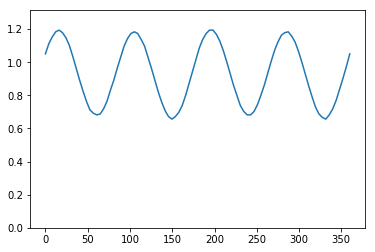

In [145]:
plt.figure()
plt.plot(positions, intensities)
plt.ylim(0,intensities.max()*1.1);

### Fitting data to sine

For linear parallel polarized we obtain that the intensity distribution is:
$\left\{\frac{1}{8} \text{Int}_0 \left(8 p_1^2 p_0^2 \sin ^2\left(\frac{\delta }{2}\right) \sin ^2(2 \theta )-4 p_1 p_0^3 \sin (\delta ) \sin (2 \theta )+4 p_1^3 p_0 \sin (\delta ) \sin (2 \theta )+p_0^4 \left(2 \cos (\delta ) \sin ^2(2 \theta )+\cos (4 \theta )+3\right)+p_1^4
   \left(2 \cos (\delta ) \sin ^2(2 \theta )+\cos (4 \theta )+3\right)\right)\right\}$
   
When $p_0 =0.0653499037607 $ and $p_1 = 0.758623923874 $

$I(\delta,\theta)=I_0 (-0.0203947 \cos (\delta -4 \theta )+0.00707994 \cos (\delta -2 \theta )-0.00707994 \cos (\delta +2 \theta )-0.0203947 \cos (\delta +4 \theta )+0.0407893 \cos (\delta )+0.0407893 \cos (4 \theta )+0.124826)$

We have to include $\theta_0$ angle since we do not know the axis angle. Then, the unknown parameters are $\theta_0$ and $\delta$.

In [146]:
from scipy import optimize
from scipy import cos, sin
degrees = sp.pi/180

In [153]:
#x = theta
#p[0]= theta_0, p[1]= delta
# Fit the first set
fitfunc = lambda p, x: 7*(-0.0203947*cos(p[1]-4*(x-p[0])) 
                        +0.00707994*cos(p[1]-2*(x-p[0])) 
                        -0.00708*cos(p[1]+2*(x-p[0])) 
                        -0.0203947*cos(p[1]+4*(x-p[0])) 
                        +0.0407893*cos(p[1]) 
                        +0.0407893*cos(4*(x-p[0])) 
                        +0.124926) # Target functio
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function

(0, 1.1937461798244189)

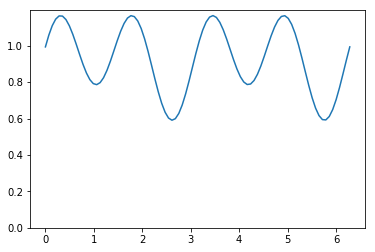

In [175]:
# prueba
plt.figure()
theta=sp.linspace(0,2*sp.pi,num_data)
p=[15*degrees, 80*degrees]
Intensidad_trial=fitfunc(p,theta)
plt.plot(theta, Intensidad_trial)
plt.ylim(ymin=0)

In [165]:
p0 = [15*degrees, 90*degrees] # Initial guess for the parameters
#positions=theta
#intensities=Intensidad_trial
p1, success = optimize.leastsq(errfunc, p0[:], args=(positions*degrees, intensities))

y_fitting=fitfunc(p1+[0*degrees,0*degrees], positions*degrees)
residuals=intensities-y_fitting


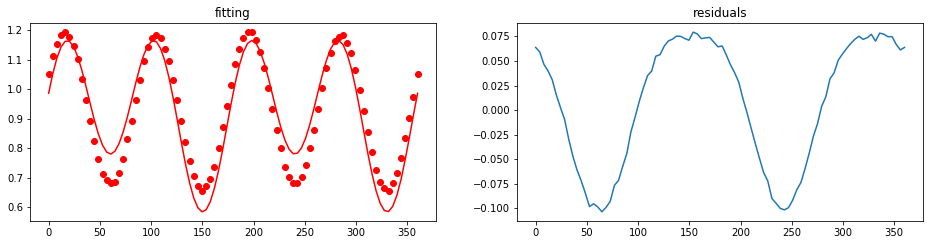

In [176]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.plot(positions, intensities, "ro")
plt.plot(positions,y_fitting , "r-") # Plot of the data and the fit

#p_changed=[p1[0], -p1[1], p1[2], p1[3]+90]
#y_fitting_changed=fitfunc(p_changed, positions)
#plt.plot(positions, y_fitting_changed, 'g')

plt.title('fitting')

plt.subplot(2,2,2)
plt.plot(positions, residuals)
plt.title('residuals')
plt.show()

In [177]:
print(p1/degrees)
print(sp.std(residuals))

[ 15.30805633  80.56446121]
0.0639134057381


## Experiments
### Linear polarized crossed

$I_0 (\sin (\theta ) \cos (\theta ) (-0.326315 \cos (\delta ) \sin (\theta ) \cos (\theta )-0.0283198 \sin (\delta ))-0.0407893 \cos (4 \theta )+0.0432471)$

In [178]:
num_data=90
positions=sp.linspace(0,360,num_data)
intensities=sp.zeros_like(positions,dtype=float)

In [179]:
for i, position_2 in enumerate(positions):
    motors.move(
        positions=[motor_1_max, position_2, 0, motor_4_min], velocities=Vels, verbose=False)
    intensities[i]=get_intensity(verbose=True)

0.15474, 0.09846, 0.05241, 0.02171, 0.01659, 0.03194, 0.06776, 0.11381, 0.18033, 0.24173, 0.31337, 0.37989, 0.44129, 0.48734, 0.51804, 0.52316, 0.51292, 0.48222, 0.43617, 0.36965, 0.30825, 0.23661, 0.17009, 0.10869, 0.06264, 0.03194, 0.01659, 0.02682, 0.05752, 0.10358, 0.16498, 0.23150, 0.30313, 0.36965, 0.43617, 0.48222, 0.51292, 0.52827, 0.52316, 0.49757, 0.45152, 0.39524, 0.32360, 0.25196, 0.18545, 0.12404, 0.06776, 0.03706, 0.02171, 0.02682, 0.04217, 0.08822, 0.14451, 0.20591, 0.27755, 0.34918, 0.41570, 0.46687, 0.50781, 0.52827, 0.51804, 0.50269, 0.46175, 0.40547, 0.33895, 0.27243, 0.20591, 0.13428, 0.08311, 0.04217, 0.02171, 0.01659, 0.03706, 0.07799, 0.13428, 0.19568, 0.26220, 0.33383, 0.40035, 0.46175, 0.50269, 0.52316, 0.52827, 0.50781, 0.47711, 0.42082, 0.35942, 0.28778, 0.22126, 0.14963, 

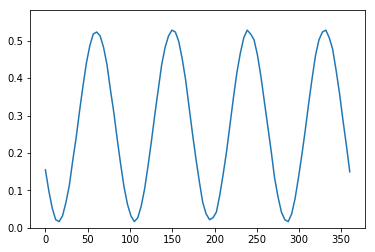

In [180]:
plt.figure()
plt.plot(positions, intensities)
plt.ylim(0,intensities.max()*1.1);

In [192]:
#x = theta
#p[0]= theta_0, p[1]= delta
# Fit the first set
theta=positions
fitfunc = lambda p, x: 20* ((sin(theta)*cos(theta)*(-0.326315*cos(p[1])*cos((x-p[0]))-0.0283198*sin(p[1])
                                              -0.0407893*cos(4*(x-p[0]))
                                              + 0.0432471))) # Target functio
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function

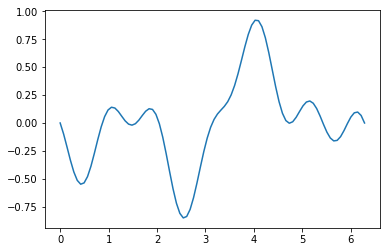

In [193]:
# prueba
plt.figure()
theta=sp.linspace(0,2*sp.pi,num_data)
p=[15*degrees, 80*degrees]
Intensidad_trial=fitfunc(p,theta)
plt.plot(theta, Intensidad_trial)

In [194]:
print(y_fitting.shape, positions.shape, intensities.shape, theta.shape, p0)

(90L,) (90L,) (90L,) (90L,) [0.2617993877991494, 1.5707963267948966]


In [195]:
p0 = [15*degrees, 90*degrees] # Initial guess for the parameters
# positions=theta
# intensities=Intensidad_trial
p1, success = optimize.leastsq(errfunc, p0[:], args=(positions*degrees, intensities))

y_fitting=fitfunc(p1, positions*degrees)
residuals=intensities-y_fitting


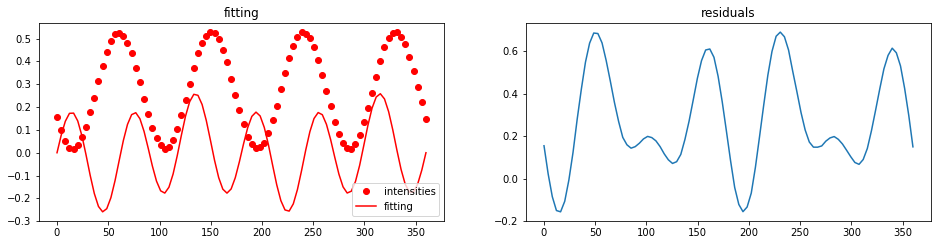

In [196]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.plot(positions, intensities, "ro", label='intensities')
plt.plot(positions,y_fitting , "r-", label='fitting') # Plot of the data and the fit
plt.legend()
plt.title('fitting')

plt.subplot(2,2,2)
plt.plot(positions, residuals)
plt.title('residuals')
plt.show()

In [197]:
print(p1/degrees)
print(sp.std(residuals))

[ 45.04085933  89.99153324]
0.23210515537


In [111]:
theta_0=p1[0]
delta=p1[1]

print("theta_0 = {:4.3f}º, delta = {:4.3f}º ".format(theta_0/degrees, delta/degrees))

theta_0 = 10.000º, delta = 80.000º 


## Final: Close

In [198]:
motors.close()
del motors
LabJackPython.Close()

In [98]:
theta

array([ 0.        ,  0.21666156,  0.43332312,  0.64998469,  0.86664625,
        1.08330781,  1.29996937,  1.51663094,  1.7332925 ,  1.94995406,
        2.16661562,  2.38327719,  2.59993875,  2.81660031,  3.03326187,
        3.24992343,  3.466585  ,  3.68324656,  3.89990812,  4.11656968,
        4.33323125,  4.54989281,  4.76655437,  4.98321593,  5.1998775 ,
        5.41653906,  5.63320062,  5.84986218,  6.06652374,  6.28318531])